## A Gentle Introduction to the Box-Jenkins Method
Autoregressive Integrated Moving Average Model, atau ARIMA merupakan model statistik yang umum digunakan untuk menganalisa dan menebak (forecast) data time series. Seiring dengan perkembangannya, penemu metode ini, yakni Box dan Jenkins. Di dalam bagian ini kita akan mempelajari metode Box-Jenkins dan aplikasinya di dalam kasus forecasting untuk data time series. Secara spesifik, kita akan mempelajari 3 hal:
- Proses ARIMA dan 3 langkah metode Box-Jenkins
- Best pratice untuk menentukan parameter q,d, dan p pada model ARIMA
- Mengevaluasi model dengan melihat overfitting dan residual errors sebagai proses diagnosa

### Autoregressive Integrated Moving Average Model
ARIMA merupakan singkatan dari AutoRegressive Integrated Moving Averahe. Merupakan bentuk generalisasi dari AutoRegressive Moving Average yang ditambah dengan integrasi. Penamaan ini tidaklah sembarangan karena ada informasi terkait, secara singkat:
* AR: Autoregression. Sebuah model yang menggunakan hubungan antara hasil observasi sekarang dan sebelumnya
* I: Integrated: Perbedaan hasil observasi sekarang dan sebelumnya dihitung untuk membuat data time series menjadi stationer
* MA: Moving Average: Model yang menggunakan hubungan antara hasil observasi dengan nilai residual error dari model moving average yang diaplikasikan pada observasi sebelumnya

Setiap komponen ini dijadikan parameter pada model. Penggunaan notasi paling standarnya adalah ARIMA (p,d,q) di mana ketiga nilai parameter ini disubstitusi dengan nilai integer yang mengindikasikan model ARIMA yang digunakan. Berikut ini adalah penjelasan dari masing-masing nilai parameter:
* p: jumlah pengamatan lampau (lag observation) di dalam model, biasa disebut lag order
* d: berapa kali hasil observasi didiferensiasi, biasa disebut derajat perbedaan (degree of differencing)
* q: ukuran jendela moving average, biasa disebut order of moving average

### Metode Box-Jenkins
Metode Box-Jenkins ini diajukan oleh George Box dan Gqilyn Jenkins pada tahun 1970 lewat buku yang mereka tulis: "Time Series Analysis: Forecasting and Control". Pendekatan yang digunakan adalah asumsi untuk menghasilkan data time series, di mana jika datanya stationer maka digunakan model ARMA tetapi jika datanya nonstationer maka model yang digunakan model ARIMA. Ada 3 langkah yang mereka gunakan:
1. **Identifikasi**. Menggunakan data dan informasi lainnya untuk mencari sub-class dari model yang paling baik untuk merangkum data
2. **Estimasi**. Menggunakan data untuk melatih parameter dari model
3. **Diagnostic Checking**. Mengevaluasi model yang sudah dibuat

Ketiga proses di atas merupakan proses yang iteratif, jadi ketika ada data baru maka proses akan diulangi kembali ke langkah 1. Sekarang kita akan melihat secara lebih jelas untuk masing-masing langkah di atas.

### Identifikasi
Proses identifikasi secara lebih jauh terbagi menjadi: asesmen apakah data time series itu stationer atau tidak, jika tidak, berapa nilai differences yang diperlukan untuk membuat model menjadi stationer. Lalu identifikas parameter dari model ARMA

#### Differencing
Berikut ini adalah beberapa tips ketika proses identifikasi:
* **Unit Root Tests**. Gunakan unit root statistical tests pada data time series untuk menentukan apakah datanya stationer atau tidak. Ulangi untuk setiap proses differencing
* **Hindari differencing yang berlebihan**. Differencing data time series melebihi dari yang diperlukan dapat mengakibatkan sistem menjadi semakin kompleks

#### Konfigurasi AR dan MA
Dua buah plot diagnostik dapat digunakan untuk memilih parameter p dan q dari ARMA atau ARIMA, yaitu:
* **Autocorrelation Function (ACF)**. Hasil plot merangkum korelasi dari hasil observasi untuk nilai-nilai sebelumnya (lag values). Di mana x-axis menunjukkan lag dan y-axis menunjukkan koefisien korelasi antara -1 dan 1, secara berurutan, untuk korelasi negatif dan positif
* **Partial Autocorrelation Function (PACF)**. Hasil plot merangkum korelasi antara hasil observasi dengan nilai-nilai sebelumnya yang tidak dihitung oleh prior lagged observations.

### Estimasi
Estimasi melibatkan metode numerik untuk meminimalkan loss atau error.

### Diagnostic Checking
Ide dari diagnostic checking adalah mencari bukti apakah model yang sudah dibuat sudah cukup baik atau belum. Ada dua area yang bisa dilakukan investigasi, yakni:
1. Overfitting
2. Residual Errors

#### Overfitting
Langkah pertama yang perlu dilakukan adalah mengecek apakah model yang sudah dibuat overfitting atau tidak. Secara umum, hal ini merupakan suatu masalah karena jika model yang dibuat tidak lagi general, maka hasil forecast data selanjutnya pasti akan menghasilkan hasil yang buruk.

#### Residual Errors
Setiap forecast pasti akan menghasilkan residual error. Distribusi dari residual inilah yang bisa digunakan untuk memahami model secara lenih.

### Kesimpulan
Dari materi kali ini, kita sudah memahami aplikasi metode Box-Jenkins untuk analisa data time series berikut predikisinya. Secara spesifik hal yang sudah dipelajari:
* Apa itu ARIMA model dan 3 langkah metode Box-Jenkins
* Cara menggunakan plot ACF dan PACF dan memilih paramter p dan q untuk model ARIMA
* Bagaimana cara menggunakan overfitting dan residual errors untuk mendiagnosa model ARIMA

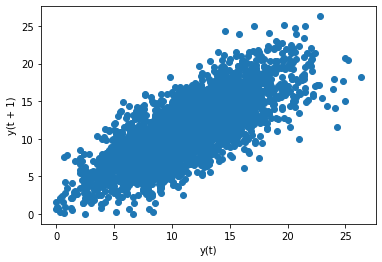

In [8]:
# lag plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
lag_plot(series)
pyplot.show()

In [9]:
# correlation of lag=1
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


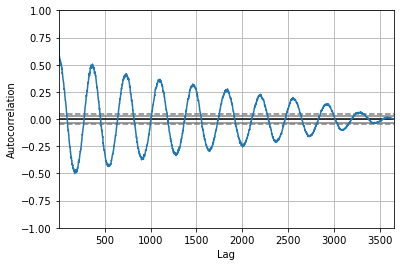

In [1]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

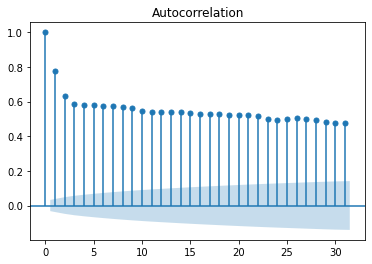

In [2]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plot_acf(series, lags=31)
pyplot.show()

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test RMSE: 1.204


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


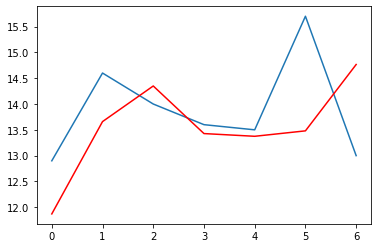

In [10]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


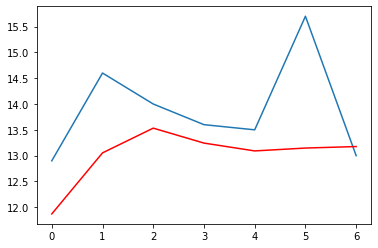

In [3]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test RMSE: 1.850


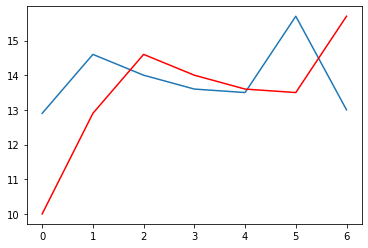

In [7]:
# evaluate a persistence model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
	return x
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

### Kesimpulan
Pada tutorial ini kita sudah mempelajari cara untuk membuat prediksi autoregression dengan menggunakan data time series:
* Mengenai autocorrelation dan autoregression dan bagaimana mereka dapat digunakan untuk memahami data secara lebih baik
* Cara untuk mengeksplorasi autokorelasi di dalam data time series menggunakan plot dan statistical test
* Cara untuk melatih model autoregression

In [12]:
# calculate residual errors for a persistence forecast model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

Test RMSE: 9.151
      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


In [13]:
# autoregressive model of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AutoReg(train_resid, lags=15)
model_fit = model.fit()
print('Coef=%s' % (model_fit.params))

Coef=[ 0.10120699 -0.84940615 -0.77783609 -0.73345006 -0.68902061 -0.59270551
 -0.5376728  -0.42553356 -0.24861246 -0.19972102 -0.15954013 -0.11045476
 -0.14045572 -0.13299964 -0.12515801 -0.03615774]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


predicted error=1.155523, expected error=9.000000
predicted error=-7.108809, expected error=-10.000000
predicted error=3.007486, expected error=3.000000
predicted error=-0.756446, expected error=-6.000000
predicted error=5.511163, expected error=30.000000
predicted error=-19.991264, expected error=-28.000000
predicted error=4.842429, expected error=2.000000
predicted error=3.050883, expected error=9.000000
predicted error=-5.141585, expected error=-7.000000
predicted error=1.161119, expected error=1.000000
predicted error=-0.241928, expected error=-9.000000
predicted error=9.159826, expected error=21.000000
predicted error=-7.117974, expected error=-13.000000
predicted error=1.182992, expected error=-2.000000
predicted error=2.769363, expected error=11.000000
predicted error=-4.959337, expected error=-11.000000
predicted error=2.566233, expected error=-8.000000
predicted error=9.084498, expected error=6.000000
predicted error=3.020899, expected error=16.000000
predicted error=-6.542098

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


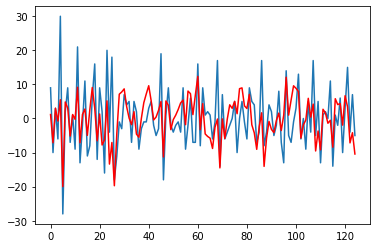

In [14]:
# forecast residual forecast error
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
window = 15
model = AutoReg(train_resid, lags=window)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
	# persistence
	yhat = test_X[t]
	error = test_y[t] - yhat
	expected_error.append(error)
	# predict error
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	pred_error = coef[0]
	for d in range(window):
		pred_error += coef[d+1] * lag[window-d-1]
	predictions.append(pred_error)
	history.append(error)
	print('predicted error=%f, expected error=%f' % (pred_error, error))
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=43.155523, expected=51.000000
predicted=43.891191, expected=41.000000
predicted=44.007486, expected=44.000000
predicted=43.243554, expected=38.000000
predicted=43.511163, expected=68.000000
predicted=48.008736, expected=40.000000
predicted=44.842429, expected=42.000000
predicted=45.050883, expected=51.000000
predicted=45.858415, expected=44.000000
predicted=45.161119, expected=45.000000
predicted=44.758072, expected=36.000000
predicted=45.159826, expected=57.000000
predicted=49.882026, expected=44.000000
predicted=45.182992, expected=42.000000
predicted=44.769363, expected=53.000000
predicted=48.040663, expected=42.000000
predicted=44.566233, expected=34.000000
predicted=43.084498, expected=40.000000
predicted=43.020899, expected=56.000000
predicted=49.457902, expected=44.000000
predicted=45.328116, expected=53.000000
predicted=45.225588, expected=55.000000
predicted=48.705924, expected=39.000000
predicted=44.166344, expected=59.000000
predicted=45.621871, expected=55.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


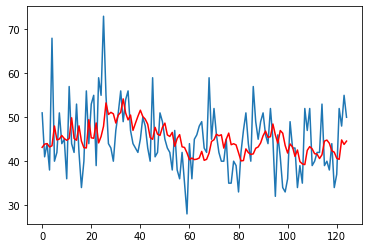

In [15]:
# correct forecasts with a model of forecast residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
window = 15
model = AutoReg(train_resid, lags=15)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
	# persistence
	yhat = test_X[t]
	error = test_y[t] - yhat
	# predict error
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	pred_error = coef[0]
	for d in range(window):
		pred_error += coef[d+1] * lag[window-d-1]
	# correct the prediction
	yhat = yhat + pred_error
	predictions.append(yhat)
	history.append(error)
	print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

### Kesimpulan
Pada tutorial ini kita sudah mempelajari cara untuk membuat model residual error time series dan menggunakannya untuk memperbaiki prediksi:
* Mengenai Moving Average (MA) untuk membuat model autoregressive terhadap residual error
* Cara untuk mengembangkan dan mengevaluasi model dari residual error untuk memprediksi forecast error
* Cara untuk menggunakan prefiksi dari forecast error untuk memperaiki model

<ipython-input-16-870b9e79a257>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


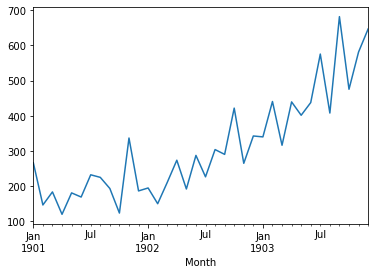

In [16]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

<ipython-input-17-cd2348a834c9>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


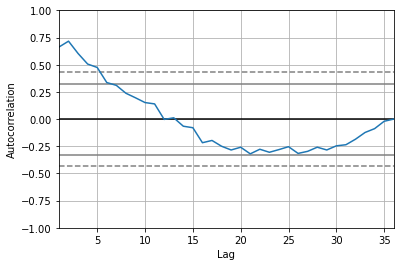

In [17]:
# autocorrelation plot of time series
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# autocorrelation plot
autocorrelation_plot(series)
pyplot.show()

<ipython-input-18-919349905ee1>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warni

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sat, 08 May 2021   AIC                            406.340
Time:                        01:48:10   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

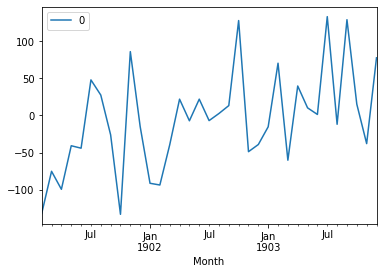

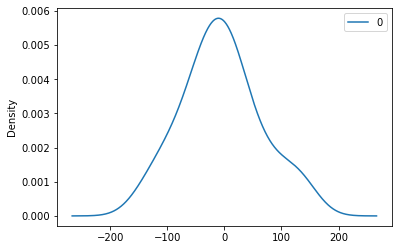

                0
count   35.000000
mean    -5.495195
std     68.132883
min   -133.296603
25%    -42.477848
50%     -7.186507
75%     24.748377
max    133.238010


In [18]:
# fit an ARIMA model and plot residual errors
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<ipython-input-19-aa4cb2c043e2>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warni

predicted=349.117642, expected=342.300000
predicted=306.512934, expected=339.700000
predicted=387.376355, expected=440.400000
predicted=348.154224, expected=315.900000
predicted=386.308736, expected=439.300000
predicted=356.082135, expected=401.300000
predicted=446.379499, expected=437.400000
predicted=394.737320, expected=575.500000
predicted=434.915519, expected=407.600000
predicted=507.923337, expected=682.000000
predicted=435.482976, expected=475.300000
predicted=652.743794, expected=581.300000
predicted=546.343410, expected=646.900000
Test RMSE: 83.417


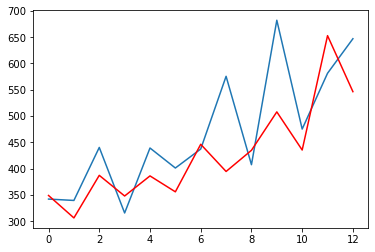

In [19]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### Kesimpulan
Pada tutorial ini kita sudah mempelajari cara untuk membuat model ARIMA untuk time series forecasting:
* Mengenai model ARIMA dan bagaimana cara untuk melakukan konfigurasi serta asumsi yang digunakan
* Cara untuk melakukan analisa time series dengan menggunakan model ARIMA
* Cara untuk menggunakan model ARIMA untuk melakukan prediksi data yang bersifat out-of-sample

## Conto Soal: Penjualan Bulanan Wine Perancis
Di dalam tutorial ini kita akan mempelajari secara lebih lannjut cara untuk melakukan forecasting penjualan bulanan dari wine Perancis.

### Overview
Di dalam tutorial ini kita akan mengerjakan suatu project yang bersifat end-to-end, mulai dari mendownload data, mendefinisikan masalah, dan melatih model sampai membuat prediksi. Berikut ini adalah langkah-langkah yang akan kita lewati:
1. Problem Description
2. Test Harness
3. Persistence
4. Data Analysis
5. ARIMA Models
6. Model Validation

### 1. Problem Description
Tujuan dari soal kali ini adalah untuk memprediksi jumlah penjualan bulanan dari wine Perancis di daerah Perrin Freres. Dataset yang digunakan merupakan data penjualan bulanan dari Januari 1964 sampai September 1972. Total data yang digunakan ada 105 hasil pengamatan. Data tersebut dapa didownload di sini: https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly_champagne_sales.csv

### 2. Test Harness
Kita harus mengembangkan test harness untuk menginvestigasi data dan mengevaluasi kandidat model. Ada dua langkah yang terlibat di dalam proses ini:
1. Mendefinisikan Dataset Validasi
2. Mengembangkan Metode untuk Evaluasi Model

#### 2.1 Validation Dataset
Dataset yang digunakan bukanlah dataset baru sehingga datanya juga sudah tidak diupdate. Oleh karena itu kita akan mengasumsikan data diperoleh pada tahun 1971 dan akan diprediksi untuk data selama 1 tahun ke depan. Data di bawah akan memanggil data yang digunakan lalu dibagi menjadi data latih dan data uji

In [21]:
# separate out a validation dataset
from pandas import read_csv
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 93, Validation 12


Penjelasan dari dua file yang disimpan:
* dataset.csv: Hasil observasi dari Januari 1964 sampai September 1971 (93 observasi)
* validation.csv: Hasil observasi dari Oktober 1971 sampai September 1972 (12 observasi)

#### 2.2 Evaluasi Model
Parameter yang akan digunakan untuk melakukan evaluasi model ini adalah RMSE (Root Mean Squared Error)

### 3. Persistance
Langkah awal yang harus dilakukan sebelum melakukan analisa data adalah menentukan baseline dari performansi model. Langkah ini akan menghasilkan template untuk melakukan evaluasi model dengan menggunakan test harness yang sudah ditentukan dan performansi model. Baseline dari prediksi di dalam time series forecasting biasa disebut naive forecast, atau persistance.

Di dalam langkah ini hasil observasi dari waktu yang lampau digunakan untuk memprediksi pengamatan di waktu ke depan. 

In [24]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=5428.000, Expected=8314
>Predicted=8314.000, Expected=10651
>Predicted=10651.000, Expected=3633
>Predicted=3633.000, Expected=4292
>Predicted=4292.000, Expected=4154
>Predicted=4154.000, Expected=4121
>Predicted=4121.000, Expected=4647
>Predicted=4647.000, Expected=4753
>Predicted=4753.000, Expected=3965
>Predicted=3965.000, Expected=1723
>Predicted=1723.000, Expected=5048
>Predicted=5048.000, Expected=6922
>Predicted=6922.000, Expected=9858
>Predicted=9858.000, Expected=11331
>Predicted=11331.000, Expected=4016
>Predicted=4016.000, Expected=3957
>Predicted=3957.000, Expected=4510
>Predicted=4510.000, Expected=4276
>Predicted=4276.000, Expected=4968
>Predicted=4968.000, Expected=4677
>Predicted=4677.000, Expected=3523
>Predicted=3523.000, Expected=1821
>Predicted=1821.000, Expected=5222
>Predicted=5222.000, Expected=6872
>Predicted=6872.000, Expected=10803
>Predicted=10803.000, Expected=13916
>Predicted=13916.000, Expected=2639
>Predicted=2639.000, Expected=2899
>Predicted=2

Menjalankan test harness di atas memperlihatkan hasil prediksi dan observasi untuk setiap dataset. Dan kita peroleh nilai RMSE sebesar 3185.051. Berarti, secara rata-rata model ini memiliki tingkat kesalahan sebesar 3185 juta untuk setiap prediksi yang dibuat

### 4. Data Analysis
Kita dapat menggunakan summary statistics dan plot data untuk secara cepat mendapatkan informasi lebih dari masalah prediksi ini. Di dalam bagian ini, kita akan melihat data dari lima perspektif:
1. Summary statistics
2. Line Plot
3. Seasonal Line Plot
4. Density Plot
5. Box Plot

#### 4.1 Summary Statistics
Summary statistics memberikan informasi mengenai batas dari nilai hasil observasi.

In [26]:
# summary statistics of time series
from pandas import read_csv
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
print(series.describe())

count       93.000000
mean      4641.118280
std       2486.403841
min       1573.000000
25%       3036.000000
50%       4016.000000
75%       5048.000000
max      13916.000000
Name: 1, dtype: float64


Hasil summary statistics di atas memberikan beberapa hasil observasi yang penting:
* Jumlah hasil observasi sesuai dengan desain awal, yaitu 93 data
* Rataan yang diperoleh ada di sekitar 4641
* Standar deviasi penjualan adalah 2486
* Nilai precentile menunjukkan tidak ada persebaran data secara besar

#### 4.2 Line Plot
Line plot pada data time series dapat memberikan kepada kita banyak insight

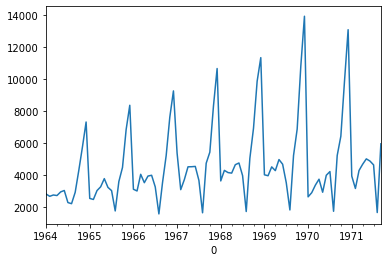

In [28]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

Hasil plot di atas memberikan beberapa informasi:
* Secara visual terlihat ada peningkatan penjualan setiap tahunnya
* Ada pola **seasonality** setiap tahunnya
* Sinyal seasonal ini tampak mengalami pertumbuhan setiap tahunnya
* Tidak ada outlier
* Sifat seasonal mengisyaratkan data ini non-stationer

#### 4.3 Seasonal Line Plots
Kita dapat mengkonfirmasi kalau sifat seasonal ini memiliki siklus tertentu setiap tahun. Untuk memastikannya, kita akan melakukan plotting per tahun

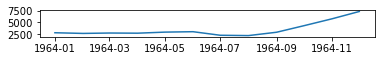

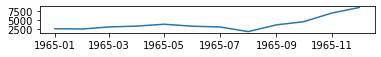

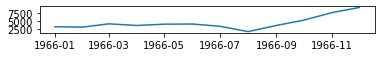

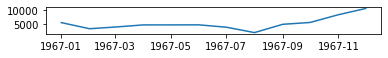

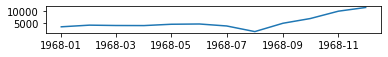

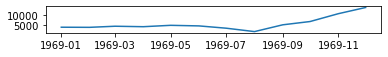

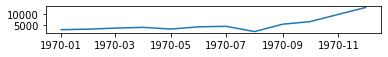

In [29]:
# multiple line plots of time series
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
    pyplot.subplot((n_groups*100) + 10 + i)
    i += 1
    pyplot.plot(group)
    pyplot.show()

Dari hasil observasi di atas kita bisa melihat kalau di bulan Agustus selalu terjaid penurunan dan peningkatan dari bulan Agustus ke Desember. Pola ini sama setiap tahunnya walau nilainya berbeda. Ini akan membantu kita untuk melakukan modelling di beberapa langkah ke depan.

#### 4.4 Density Plot
Melihat density plot sangat mungkin membantu kita untuk memberikan insight mengenai struktur data

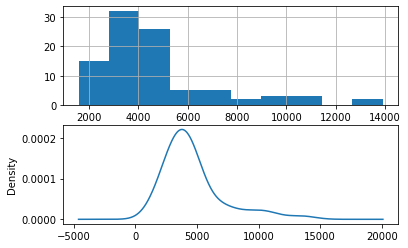

In [30]:
# density plots of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

Dari gambar di atas, ada beberapa observasi yang kita bisa lihat:
* Distribusinya tidak Gaussian
* Sangat mungkin bentuk distribusinya adalah exponential distribution

#### 4.5 Box & Whisker Plots
Kita dapat melakukan grouping untuk data bulanan berdasarkan tahun dan memperoleh informasi persebaran data penjualan setiap tahunnya. 

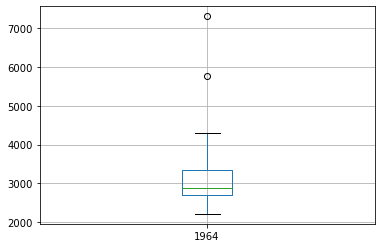

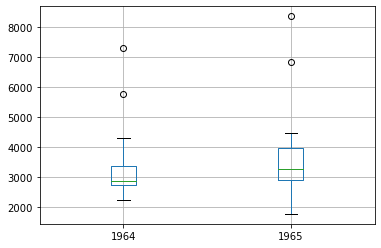

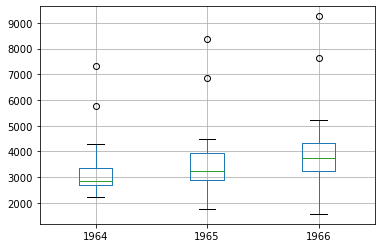

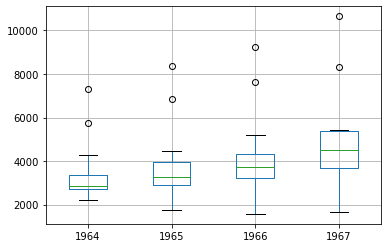

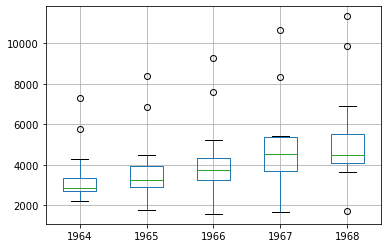

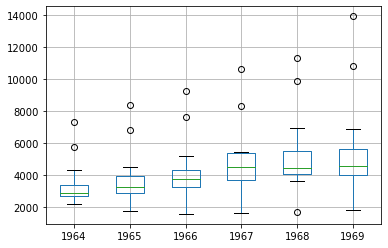

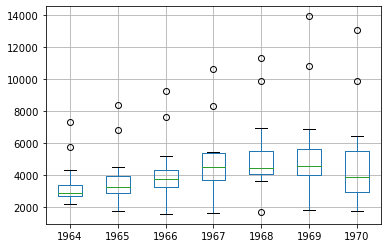

In [32]:
# boxplots of time series
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
    years.boxplot()
    pyplot.show()

Dari hasil box plot di atas, ada beberapa informasi yang bisa kita amati:
* Nilai median (garis hijau) setiap tahunnya mengalami peningkatan
* Sebaran dari nilai tengah dari 50 persen data (kotak biru) relatif terlihat stabil
* Ada outliers setiap tahunnya, dan nampaknya ini adalah nilai puncak dan lembah dari siklus seasonel
* Data tahun 1970 menunjukkan perubahan trend dari tahun-tahun sebelumnya

### 5. ARIMA Models
Pada bagian ini kita akan mengembangkan Autoregressive Integrated Moving Average, atau ARIMA, model untuk menyelesaikan masalah ini. Kita akan melakukan pendekatan modelling dengan menggunakan cara manual dan automatic. Ada 3 hal yang akan kita lakukan:
1. Konfigurasi ARIMA secara manual
2. Konfigurasi ARIMA secara otomatis
3. Review Residual Errors

#### 5.1. Konfigurasi ARIMA secara manual
ARIMA (p,d,q) model membutuhkan tiga paramter dan secara tradisional dikonfigurasi secara manual. Analisa data time series selalu mengasumsikan data yang digunakan adalah data stationer. Tetapi, dalam kasus ini sangat terlihat kalau data yang digunakan bersifat non stationer. Kita dapat melakukan hal ini dengan melihat perbedaan nilai antara hasil observasi sekarang dengan observasi sebelumnya (differencing) dan dengan menggunakan statistical test untuk mengkonfirmasi hasilnya stationer.

Pola seasonality di dalam data ini nampak terjadi tahun ke tahun. Data seasonal ini dapat dipisahkan dari hasil pengamatan dengan mengambil semua data seasonal dari data bulan yang sama pada tahun-tahun sebelumnya. Interval yang dipilih adalah 12 supaya nanti ketika ada seasonal per tahun akan dicari selisih dengan data seasonal yang sama di bulan sebelumnya

ADF Statistic: -7.134898
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


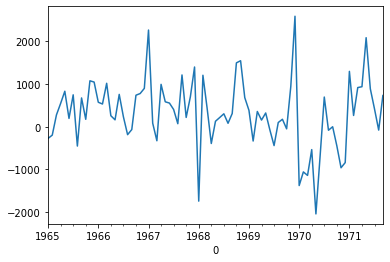

In [37]:
# create and summarize stationary version of time series
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv', header=False)
# plot
stationary.plot()
pyplot.show()

Hasil plot yang dibuat memperlihatkan tidak ada lagi pola seasonality, yang menunjukkan proses pengurangan (differencing) secara seasonal merupakan langkah baik untuk melakukan modeling. Kita akan menggunakan dataset baru ini sebagai input ke model ARIMA. Karena terlihat data ini sudah oke, kita akan menset nilai d dari model ARIMA menjadi 0.

Langkah selanjutnya yang harus kita lakukan adalah memilih nilai lag values untuk Autoregression (AR) dan Moving Average (MA), yaitu p dan q. Kita dapat menentukan ini dengan menggunakan Autocorrelation Functin (ACF) dan Partial Autocorrelation Function (PACF). Ingat, pada saat ini kita menggunakan dataset yang sudah distationerkan. Hal ini karena proses seasonal differencing sudah kita lakukan sebelumnya. Contoh code di bawah ini menghasilkan ACF dan PACF plot untuk data kita.

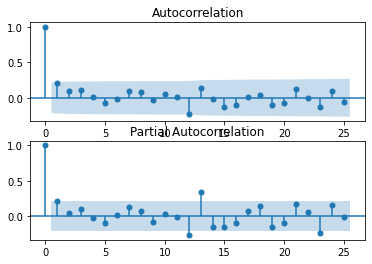

In [46]:
# ACF and PACF plots of time series
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = read_csv('stationary.csv', header=None, index_col=0, parse_dates=True,
squeeze=True)
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, lags=25, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, lags=25, ax=pyplot.gca())
pyplot.show()

Dari hasil di atas, kita mendapat beberapa informasi yang bisa kita gunakan untuk menentukan nilai ACF dan PACF. Berikut adalah hasil observasinya:
* ACF menunjukkan nilai significant lag selama 1 bulan
* PACF menunjukkan nilai significant lag selama 1 bulan, dan significant lagi kembali di bulan ke-12 dan 13
* Baik ACF dan PACF menunjukkan penurunan nilai di titik yang sama

Dari sini, kita bisa menebak nilai starting point untuk p dan q juga sama-sama 1. PACF menunjukkan kalau masih ada seasonality yang terjadi pada data yang sudah distationerkan. Berarti ada beberapa perlakuan yang perlu kita lakukan selain hanya melakukan proses differensiasi, misalnya dengan membuang data seasonality tersebut

Hasil analisa di atas juga memberikan kita tebakan nilai ARIMA (1,0,1) pada data stationer mungkin merupakan awal tebakan yang baik. Namun setelah dicoba ternyata hasil masih memberikan error, karena itu kita akan melakukan fine tuning dengan mengubah nilai d menjadi 1.

In [58]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)

    
# evaluate manually configured ARIMA model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

>Predicted=8089.910, Expected=8314.000
>Predicted=9742.864, Expected=10651.000
>Predicted=5986.916, Expected=3633.000
>Predicted=3887.122, Expected=4292.000
>Predicted=4038.104, Expected=4154.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

>Predicted=4992.352, Expected=4121.000
>Predicted=5156.514, Expected=4647.000
>Predicted=5046.672, Expected=4753.000
>Predicted=4143.813, Expected=3965.000
>Predicted=2102.954, Expected=1723.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

>Predicted=5228.291, Expected=5048.000
>Predicted=5873.383, Expected=6922.000
>Predicted=8571.311, Expected=9858.000
>Predicted=11006.038, Expected=11331.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

>Predicted=4087.480, Expected=4016.000
>Predicted=4771.845, Expected=3957.000
>Predicted=4676.045, Expected=4510.000
>Predicted=4583.387, Expected=4276.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

>Predicted=5117.362, Expected=4968.000
>Predicted=5208.156, Expected=4677.000
>Predicted=4436.417, Expected=3523.000
>Predicted=2180.897, Expected=1821.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

>Predicted=5471.233, Expected=5222.000
>Predicted=7337.609, Expected=6872.000
>Predicted=10268.365, Expected=10803.000
>Predicted=11725.442, Expected=13916.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

>Predicted=4519.565, Expected=2639.000
>Predicted=4605.979, Expected=2899.000
>Predicted=4938.925, Expected=3370.000
>Predicted=4495.261, Expected=3740.000
>Predicted=5109.008, Expected=2927.000
>Predicted=4285.915, Expected=3986.000
>Predicted=3155.258, Expected=4217.000
>Predicted=1830.005, Expected=1738.000
>Predicted=5135.170, Expected=5221.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

>Predicted=6806.892, Expected=6424.000
>Predicted=10644.038, Expected=9842.000
>Predicted=13605.823, Expected=13076.000
>Predicted=2265.381, Expected=3934.000
>Predicted=2938.910, Expected=3162.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

>Predicted=3341.705, Expected=4286.000
>Predicted=3882.924, Expected=4676.000
>Predicted=3157.016, Expected=5010.000
>Predicted=4615.083, Expected=4874.000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

>Predicted=4625.000, Expected=4633.000
>Predicted=2044.096, Expected=1659.000
>Predicted=5404.429, Expected=5951.000
RMSE: 956.947


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


#### 5.2 Grid Search ARIMA Hyperparameters
Hasil ACF dan PACF memberi anjuran nilai yang paling baik yang bisa kita pilih adalah ARIMA(1,0,1). Untuk mengkonfirmasi hal ini kita bisa lakukan dengan menerapkan grid search pada ARIMA huperparameters. Ada 3 nilai yang akan kita ujikan:
* p: 0 sampai 6
* d: 0 sampai 2
* q: 0 sampai 6

Ada (7x3x7) kemungkinan hasil yang akan kita bandingkan.

In [60]:
# grid search ARIMA parameters for time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        months_in_year = 12
        diff = difference(history, months_in_year)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
        print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=939.464
ARIMA(0, 0, 2) RMSE=962.289
ARIMA(0, 0, 3) RMSE=944.237
ARIMA(0, 0, 4) RMSE=958.792
ARIMA(0, 0, 5) RMSE=986.835
ARIMA(0, 0, 6) RMSE=1087.014
ARIMA(0, 1, 1) RMSE=958.297
ARIMA(0, 1, 2) RMSE=959.961
ARIMA(0, 1, 3) RMSE=975.970
ARIMA(0, 1, 4) RMSE=986.296
ARIMA(0, 1, 5) RMSE=1011.707
ARIMA(0, 1, 6) RMSE=1025.439
ARIMA(0, 2, 1) RMSE=1146.987
ARIMA(0, 2, 2) RMSE=986.844
ARIMA(0, 2, 3) RMSE=997.305
Best ARIMA(0, 0, 1) RMSE=939.464
ARIMA(1, 0, 0) RMSE=944.449
ARIMA(1, 1, 0) RMSE=1070.204
ARIMA(1, 1, 1) RMSE=956.947
ARIMA(1, 2, 0) RMSE=1555.858
Best ARIMA(0, 0, 1) RMSE=939.464
ARIMA(2, 0, 0) RMSE=955.134
ARIMA(2, 0, 1) RMSE=948.643
ARIMA(2, 1, 0) RMSE=1030.467
ARIMA(2, 1, 1) RMSE=980.963
ARIMA(2, 2, 0) RMSE=1346.598
ARIMA(2, 2, 1) RMSE=1039.656
Best ARIMA(0, 0, 1) RMSE=939.464
ARIMA(3, 0, 0) RMSE=959.165
ARIMA(3, 1, 0) RMSE=1028.226
ARIMA(3, 1, 1) RMSE=979.939
ARIMA(3, 2, 0) RMSE=1244.846
Best ARIMA(0, 0, 1) RMSE=939.464
ARIMA(4, 0, 0) RMSE=968.411
ARIMA(4, 0, 1) RM

Hasil menunjukkan kalau hasil terbaik yang bisa diperoleh adalah ARIMA(0,0,1)

### 6. Residual Error
Hasil pengecekan yang baik seharusnya memberikan nilai residual forecast yang memiliki distribusi Gaussian dan rataan erro 0. Kita bisa melakukan ini dengan melakukan perhitungan berikut:

                 0
count    47.000000
mean    165.904748
std     934.696241
min   -2164.247347
25%    -289.651647
50%     191.759612
75%     732.992174
max    2367.304896


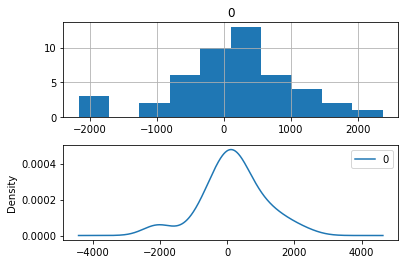

In [62]:
# summarize ARIMA forecast residuals
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

### Finalisasi Model

In [64]:
# save finalized model
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(0,0,1))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = 165.904728
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

>Predicted=6794.774, Expected=6981.000
>Predicted=10101.763, Expected=9851.000
>Predicted=13219.067, Expected=12670.000
>Predicted=3996.535, Expected=4348.000
>Predicted=3465.934, Expected=3564.000
>Predicted=4522.683, Expected=4577.000
>Predicted=4901.336, Expected=4788.000
>Predicted=5190.094, Expected=4618.000
>Predicted=4930.190, Expected=5312.000
>Predicted=4944.785, Expected=4298.000
>Predicted=1699.409, Expected=1413.000
>Predicted=6085.324, Expected=5877.000
RMSE: 361.110


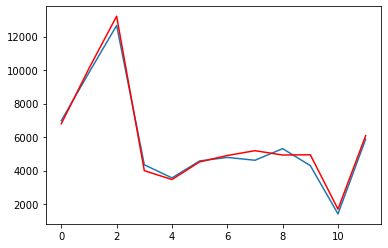

In [65]:
# load and evaluate the finalized model on the validation dataset
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load and prepare datasets
dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()